# Lending club case study

- Understanding driving factors to mitigate the following risks
    - Finanncial loss by accepting loans for the applicant who will unlikely pay the loan
    - Loss of business by rejecting loan for applicant who likely to pay the loan. 



## Approach


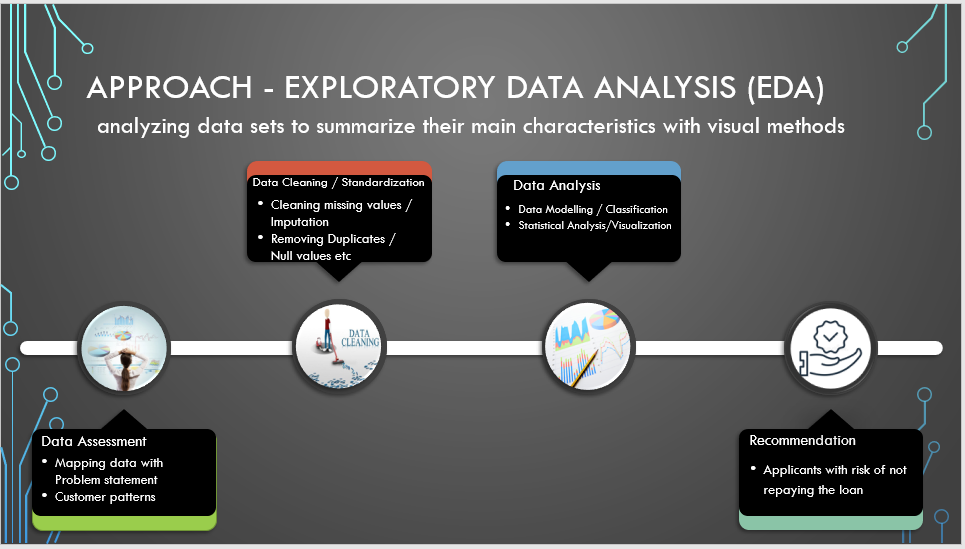

### 1.0 Data Assesment


In [56]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


##### 1.1 load the data into dataframe.

loan.csv file is in the root folder. 
encoding is used as there are some Columns (47) have mixed types so encoding is used 

In [2]:
# numbers in the data has more unnecessary precsion and scale. so set the format to 2 decimle place. 
pd.options.display.float_format = '{:,.2f}'.format

#load the data to dataframe 
df_loans = pd.read_csv("loan.csv",encoding = "ISO-8859-1", low_memory=False)

##### 1.2 Understand the data types / patterns


In [7]:
#check the number of rows and columns
df_loans.shape

(39717, 111)

In [8]:
#check the datatypes
df_loans.dtypes.to_dict() 


{'id': dtype('int64'),
 'member_id': dtype('int64'),
 'loan_amnt': dtype('int64'),
 'funded_amnt': dtype('int64'),
 'funded_amnt_inv': dtype('float64'),
 'term': dtype('O'),
 'int_rate': dtype('O'),
 'installment': dtype('float64'),
 'grade': dtype('O'),
 'sub_grade': dtype('O'),
 'emp_title': dtype('O'),
 'emp_length': dtype('O'),
 'home_ownership': dtype('O'),
 'annual_inc': dtype('float64'),
 'verification_status': dtype('O'),
 'issue_d': dtype('O'),
 'loan_status': dtype('O'),
 'pymnt_plan': dtype('O'),
 'url': dtype('O'),
 'desc': dtype('O'),
 'purpose': dtype('O'),
 'title': dtype('O'),
 'zip_code': dtype('O'),
 'addr_state': dtype('O'),
 'dti': dtype('float64'),
 'delinq_2yrs': dtype('int64'),
 'earliest_cr_line': dtype('O'),
 'inq_last_6mths': dtype('int64'),
 'mths_since_last_delinq': dtype('float64'),
 'mths_since_last_record': dtype('float64'),
 'open_acc': dtype('int64'),
 'pub_rec': dtype('int64'),
 'revol_bal': dtype('int64'),
 'revol_util': dtype('O'),
 'total_acc': dtyp

In [9]:
#finding comumns with numeric values 
df_loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00",...,0.00,0.00,0.00,0.00,"39,020.00","39,678.00",0.00,0.00,0.00,0.00
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,...,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,...,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
75%,"837,755.00","1,047,339.00","15,000.00","15,000.00","14,400.00",430.78,"82,300.00",18.60,0.00,1.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
max,"1,077,501.00","1,314,167.00","35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,...,NaN,NaN,NaN,NaN,2.00,0.00,NaN,NaN,NaN,NaN


##### 1.3 Get columns with multiple unique values. 

In [10]:
#find columns having unique values. these columns will be used for uni or Bivariate analysis

df_loans_unique_multiple=df_loans.columns[(df_loans.nunique() <= 20) & (df_loans.dtypes == ('str'))]

df_loans_unique_multiple

Index([], dtype='object')

*We will analyse these values in the data cleaning and anlysis section*

##### 1.4 Get columns with single unique values. 


In [11]:
#find columns having non aplpanumeric unique values. these columns will not be usefull for the analysis. we will remove them if necessary

df_loans_unique_single=df_loans.columns[(df_loans.nunique() == 1) & (df_loans.dtypes == ('object')) & (df_loans.dtypes == ('O')) ]

df_loans_unique_single

Index(['pymnt_plan', 'initial_list_status', 'application_type'], dtype='object')

In [12]:
#print unique values in the columns having only one unique value

print("unqiue values for pymnt_plan: " + str(set(df_loans.pymnt_plan.unique())))

print("unqiue values for initial_list_status: " + str(set(df_loans.initial_list_status.unique())))

print("unqiue values for application_type: " + str(set(df_loans.application_type.unique())))



unqiue values for pymnt_plan: {'n'}
unqiue values for initial_list_status: {'f'}
unqiue values for application_type: {'INDIVIDUAL'}


In [13]:
#check number of rows with null values
df_loans.isnull().values.any()


True

In [14]:
#check the list of the columns with empty values

nullclmns = df_loans.columns[df_loans.isnull().sum(axis=1)]

nullclmns


Index(['tot_cur_bal', 'tot_coll_amt', 'open_acc_6m', 'acc_now_delinq',
       'verification_status_joint', 'tot_cur_bal', 'tot_coll_amt',
       'tot_coll_amt', 'tot_cur_bal', 'tot_coll_amt',
       ...
       'open_acc_6m', 'open_acc_6m', 'open_il_6m', 'open_il_6m', 'open_acc_6m',
       'open_acc_6m', 'open_acc_6m', 'open_il_12m', 'open_il_12m',
       'open_acc_6m'],
      dtype='object', length=39717)

In [15]:
# number of rows with missing values (column-wise)
df_loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Observation

- emp_title does not have unique values and does not give much information about applicant 
- emp_length [1075 nulls] is `required` to determine the tenure of the loan so applicant can pay before his retirement
- mths_since_last_delinq [nulls 25682 / 39717] = less applicants failed to pay on time
- next_pymnt_d [38577 nulls / 39717] = less applicants failed to pay on time
- chargeoff_within_12_mths and tax_liens = this is either 0 or NA, so not useful for any anlysis
- next_pymnt_d [38577 nulls] appliants with next_pymnt_d null meaning loan is fully paid or charged off. rest of the records with loan status, current

#### 2.0 Data cleaning

#### 2.1 Remove columns with null values across all the rows

In [16]:
##backup the dataframe
df_loansbk=df_loans
#remove the columns with NA values

df_loans=df_loans.dropna(axis=1,how='all')

#check if columns are removed

df_loans.shape

(39717, 57)

*After removing columns with empty value, 57 / 111 columns remains*

In [17]:
# number of rows with missing values (column-wise)
df_loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### 2.2 Remove columns with single unique value

In [18]:
#refer item 1.4 to get columns with single unique values
df_loans.drop(['pymnt_plan', 'initial_list_status', 'application_type'], axis = 1, inplace = True)
print(df_loans.columns)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [19]:
#verify if columns are deleted.  
df_loans.shape

(39717, 54)

*after removing columns with single unique value, 54 columns remains.*

#### 2.3 Imputation 

In [20]:
#since emp_length is important column, lets impute values. 
## let’s calculate the mode of that column and impute those values to the missing values.
emp_length_mode = df_loans.emp_length.mode()[0]
emp_length_mode

'10+ years'

#### Observation

- We could have used loan issue date to determine the experience (emp length) but loan might have approved based on other factors than working
- Another option to impute the values based on annual income. we could take emp length from similar / close to annual income however it might not accurate as it varied based on tyoe of employment, education and location
- so we use mode to impute the values

In [21]:
#fill missing values with mode
df_loans.emp_length.fillna(emp_length_mode, inplace = True)


In [22]:
# number of rows with missing values in emp_length column
df_loans.emp_length.isnull().sum()

0

*no columns with null values*

#### 2.3 Handling Outliers


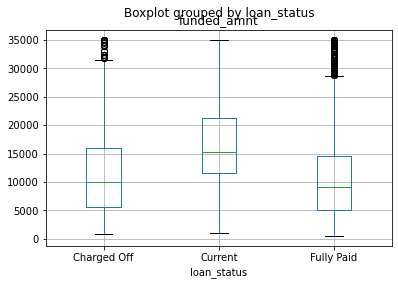

In [188]:
#find outliers

df_loans.boxplot(column='funded_amnt',by='loan_status')
plt.show()

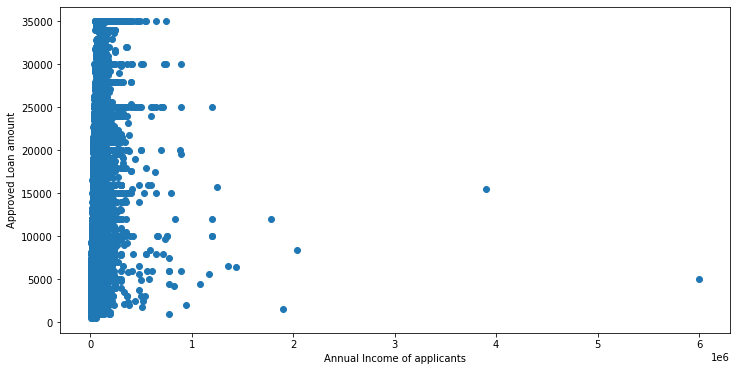

In [190]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df_loans['annual_inc'], df_loans['funded_amnt'])
ax.set_xlabel('Annual Income of applicants')
ax.set_ylabel('Approved Loan amount')
plt.show()

#### Observation
- Applicants whose annual income is above 82k (i.e. 75%) is outlier
- Applicants whose annual income is below 4k (i.e. 25%) is outlier

*but we dont remove these applicant records*

In [24]:
#number of applicants fall into outliers
Q1 = df_loans.annual_inc.quantile(0.25)
Q3 = df_loans.annual_inc.quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

df_loans_outliers =df_loans[((df_loans.annual_inc < lower) | (df_loans.annual_inc > upper))]
print(df_loans_outliers.annual_inc.describe())
df_loans_outliers.shape


count       1,843.00
mean      225,333.01
std       213,848.14
min       145,596.00
25%       159,996.00
50%       180,000.00
75%       225,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64


(1843, 54)

- 1743 records are outliers but we keep them 

================================================================================

#### 3.0 Data Analysis



##### 3.1 Univariate Analysis

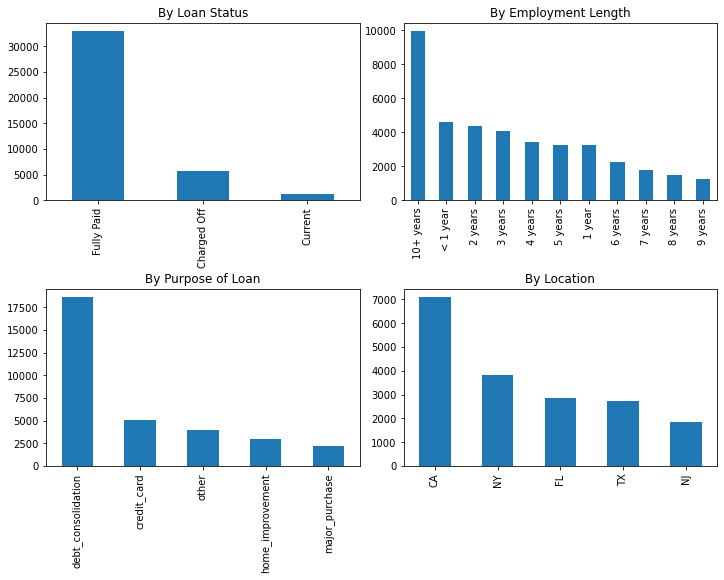

In [452]:
#Determine number of applicants who has Fully Paid
plt.clf()

plt.subplot(221)
df_loans.loan_status.value_counts(normalize=False).plot(kind = 'bar', title = "By Loan Status",figsize=(10,8))
plt.tight_layout(pad=0.5)

#Determine defaulters based on experiance level
plt.subplot(222)
df_loans.emp_length.value_counts(normalize=False).plot(kind = 'bar', title = "By Employment Length",figsize=(10,8))
plt.tight_layout(pad=0.5)


#Determine defaulters based on the top 5 purpose of the loan
plt.subplot(223)
df_loans.purpose.value_counts().sort_values(ascending=False)[:5].plot(kind='bar', title="By Purpose of Loan")

plt.tight_layout(pad=0.5)


#Determine top 5 defaulters from the location
plt.subplot(224)
df_loans.addr_state.value_counts().sort_values(ascending=False)[:5].plot(kind='bar', title="By Location")

plt.show()

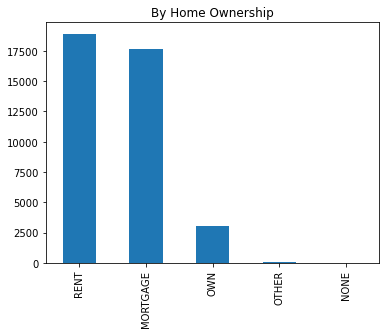

In [453]:
#Determine number of applicants who has Fully Paid
plt.subplot(221)
df_loans.home_ownership.value_counts(normalize=False).plot(kind = 'bar', title = "By Home Ownership",figsize=(10,8))
plt.tight_layout(pad=0.5)

plt.show()

##### 3.2 Bivariate Analysis


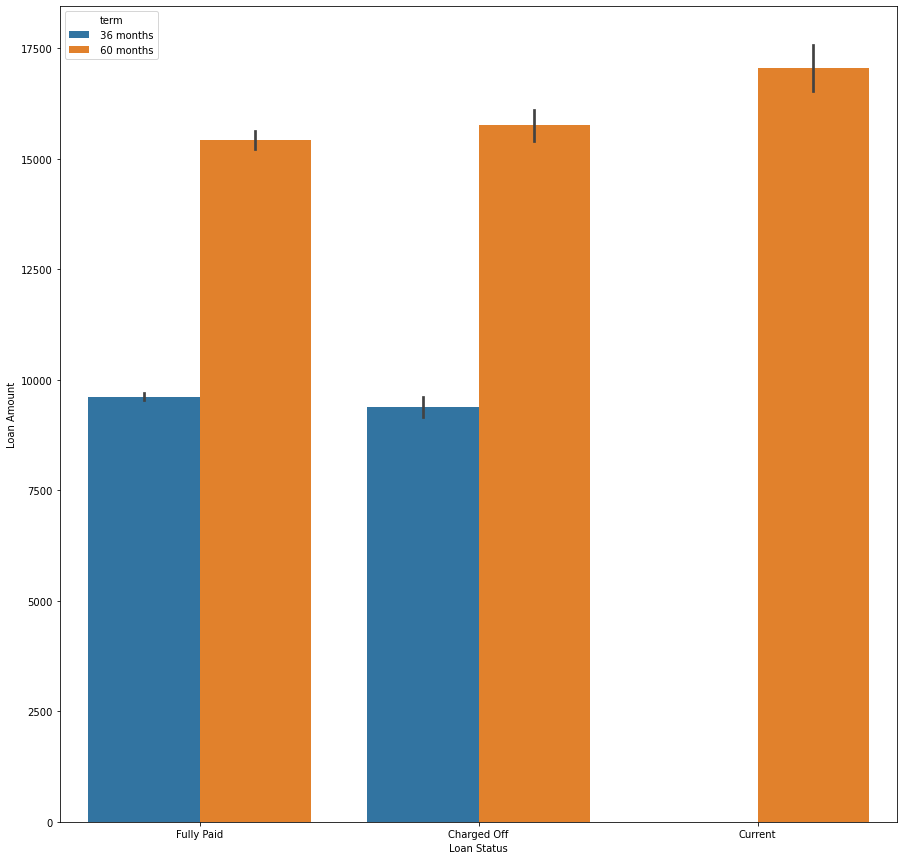

In [326]:
#take a look at the loan amount per loan status and term
plt.figure(figsize=(15,15))
ax = sns.barplot(x="loan_status",y='loan_amnt',hue='term', data=df_loans)
ax.set(xlabel='Loan Status', ylabel='Loan Amount')
plt.show()

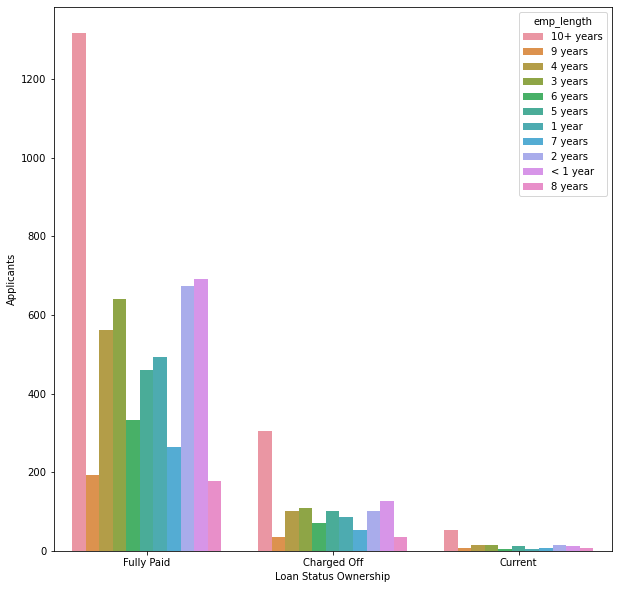

In [436]:
#take a look at the number of applicants per home ownership status
 

df_loans_CA = df_loans[(df_loans.addr_state=='CA') &
                                                     (df_loans.home_ownership!='OTHER') &
                                                    (df_loans.home_ownership!='NONE')]
                                                    

plt.figure(figsize=(10,10))
sns.countplot(x='loan_status', hue='emp_length', data=df_loans_CA)
plt.xlabel("Loan Status Ownership")
plt.ylabel("Applicants")

plt.show()

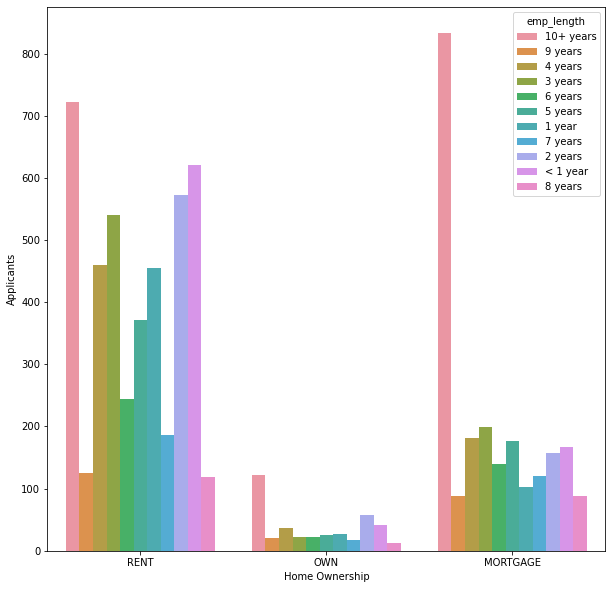

In [454]:
#take a look at the number of applicants per home ownership status
 

df_loans_CA = df_loans[(df_loans.addr_state=='CA') &
                                                     (df_loans.home_ownership!='OTHER') &
                                                    (df_loans.home_ownership!='NONE')]
                                                    

plt.figure(figsize=(10,10))
sns.countplot(x='home_ownership', hue='emp_length', data=df_loans_CA)
plt.xlabel("Home Ownership")
plt.ylabel("Applicants")

plt.show()

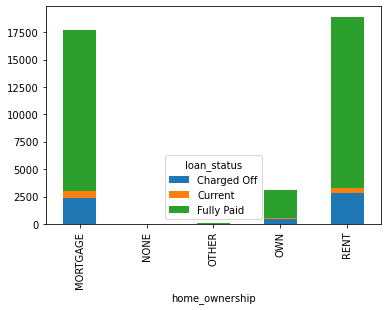

In [362]:
#take a look at the number of applicants per lpan status
df_loans_sts_ho = df_loans.groupby(['loan_status', 'home_ownership']).size().reset_index().pivot(columns='loan_status', index='home_ownership', values=0)

df_loans_sts_ho.plot(kind='bar',stacked=True)
plt.show()

###### Observation
- Long term loans get charged off more than short term. In general, Long term loans are more popular. 
- Applicant who stays in rented or mortgage houses are charged off more than applicants with own houses. 

###### 3.2 Study applicants with charged off (defaulted on the loan )


In [31]:
#filter data of defaulted applicants

df_loans_defaulters = df_loans[df_loans.loan_status == 'Charged Off']
df_loans_defaulters.shape

(5627, 54)

#### Observation 
- 5,627 of 39,717 (around 14% applicants are charged off)

let's study thes applicants 

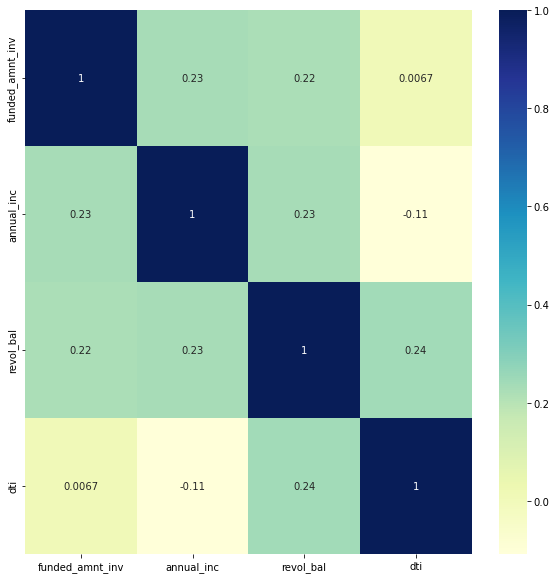

In [458]:
#determine the correlation between annual income and approved fund 

df_loans_defaulters_corr_ds = df_loans_defaulters[['funded_amnt','funded_amnt_inv', 'annual_inc','revol_bal','dti']]
df_loans_defaulters_corr = df_loans_defaulters_corr_ds.corr()

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(df_loans_fullypaid_wodc_corr, ax = ax, cmap ="YlGnBu", annot=True) 
plt.show()


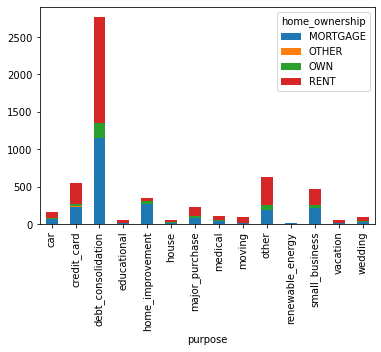

In [393]:
#Determine defaulters based on purpose of the loan and current home ownership

df_loans_defaulters_pur_ho = df_loans_defaulters.groupby(['purpose', 'home_ownership']).size().reset_index().pivot(columns='home_ownership', index='purpose', values=0)

df_loans_defaulters_pur_ho.plot(kind='bar',stacked=True)
plt.show()


#### Observation 
- most of the defaulters taken loan to cleat the debt and stays either in rented house or mortgage house

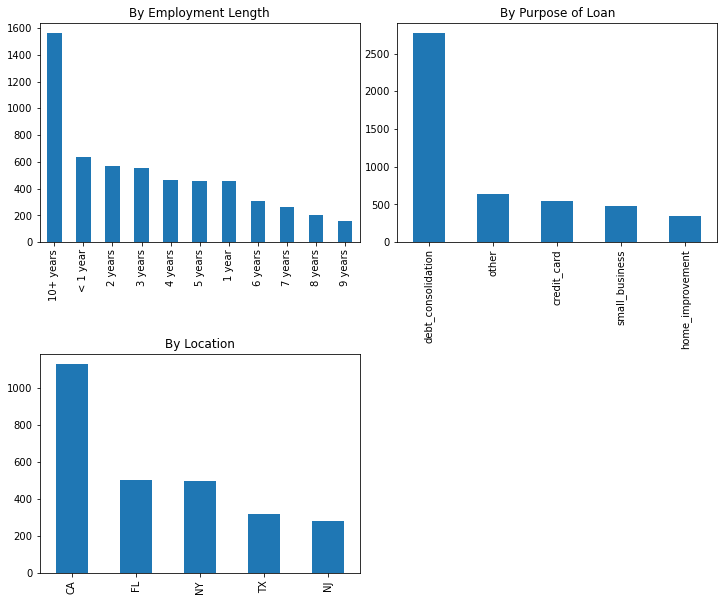

In [309]:
#Determine defaulters based on experiance level
plt.subplot(221)
df_loans_defaulters.emp_length.value_counts(normalize=False).plot(kind = 'bar', title = "By Employment Length",figsize=(10,8))
plt.tight_layout(pad=0.5)


#Determine defaulters based on the top 5 purpose of the loan
plt.subplot(222)
df_loans_defaulters.purpose.value_counts().sort_values(ascending=False)[:5].plot(kind='bar', title="By Purpose of Loan")

plt.tight_layout(pad=0.5)


#Determine top 5 defaulters from the location
plt.subplot(223)
df_loans_defaulters.addr_state.value_counts().sort_values(ascending=False)[:5].plot(kind='bar', title="By Location")

plt.show()

#### Observation 
- Taken loan to cleat the debt and stays either in rented house or mortgage house
- Higher number of years of experience 
- Stay in California

So we need to analyze these three dimensions in the applicants who has fully paid the loan (potential business for investors)


###### Bivariate and Univariate Analysis

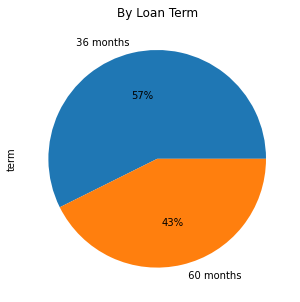

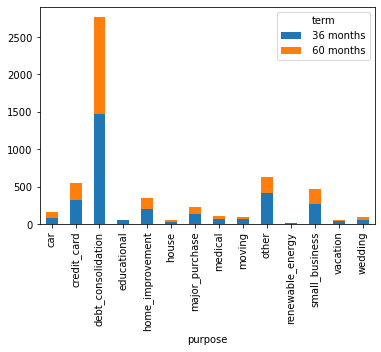

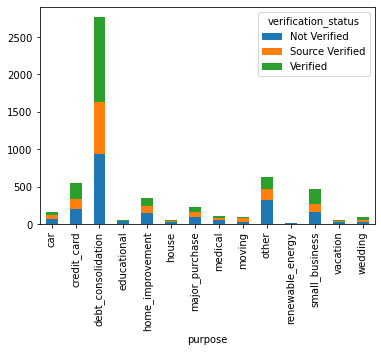

In [399]:

#Determine defaulters based on purpose of the loan and current home ownership

df_loans_defaulters.term.value_counts(normalize=True).plot(kind = 'pie', title = "By Loan Term", autopct='%1.f%%')
plt.tight_layout(pad=0.0)


df_loans_defaulters_pur_ho = df_loans_defaulters.groupby(['purpose', 'term']).size().reset_index().pivot(columns='term', index='purpose', values=0)
df_loans_defaulters_pur_ho.plot(kind='bar',stacked=True)
plt.show()


df_loans_defaulters_pur_ho = df_loans_defaulters.groupby(['purpose', 'verification_status']).size().reset_index().pivot(columns='verification_status', index='purpose', values=0)
df_loans_defaulters_pur_ho.plot(kind='bar',stacked=True)
plt.show()



#### Observation 
- term distribution across defaulters is closed to 36 or 60 months hence will not be useful in the assessment. 
- Loan term and debt consolidation also almost same number of applicant.
- verification status also does not give much information

hence this will be ruled out for identifying Risky profile


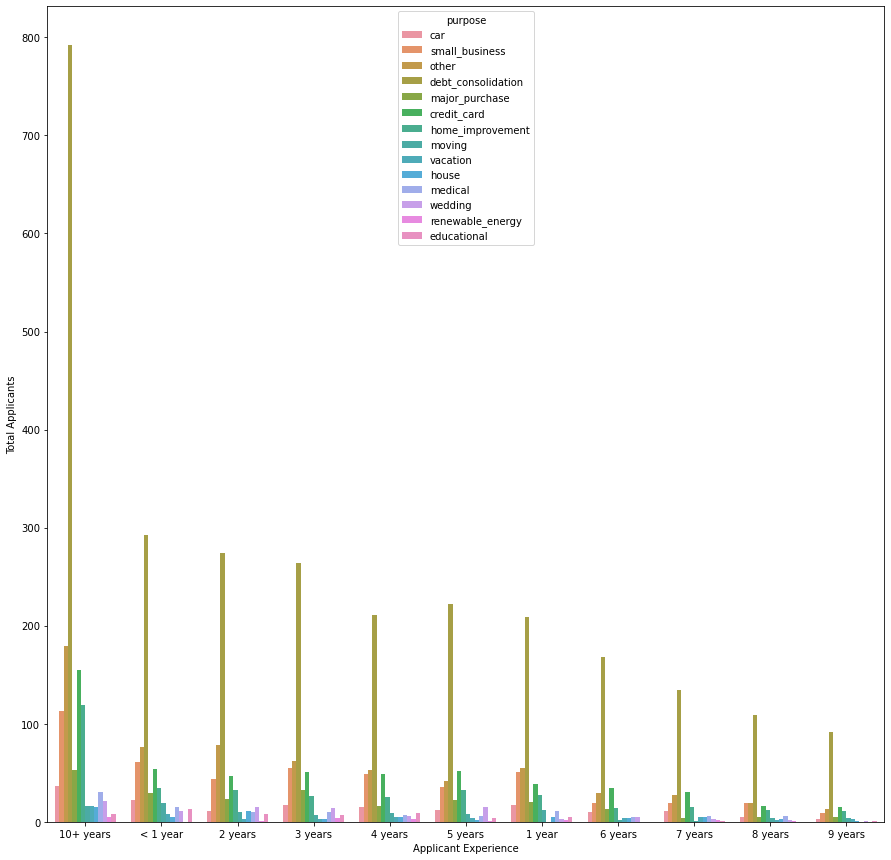

In [291]:
#determine purpose vs experiance level

plt.figure(figsize=(15,15))

sns.countplot(x='emp_length',hue='purpose',data=df_loans_defaulters,
            order = df_loans_defaulters['emp_length'].value_counts().index)

plt.xlabel('Applicant Experience')
plt.ylabel('Total Applicants')
plt.show()


#### Observation 
- Most of the defaulters are from higher experiance
- Most of the defaulters taken loan to clear the debts

We need to sieve out such applicants with Loan Status as Fully Paid or Current 

~----------------------------------------------------------------------------------------------------------~
~-------------------------------------------------------------~


##### 3.2 Study Applicants with no loan (fully paid)


In [410]:
#filter data of applicants who has paid the loan

df_loans_fullypaid = df_loans[df_loans.loan_status == 'Fully Paid']
df_loans_fullypaid.shape

(32950, 54)

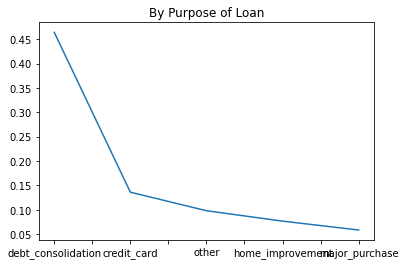

In [456]:
#determine applicants who has taken loan to pay the debt. These customers might be risky

df_loans_fullypaid.purpose.value_counts(normalize=True).sort_values(ascending=False)[:5].plot(kind='line', title="By Purpose of Loan")
plt.show()

#### Observation 
- There are 46% of the applicants cleared the debt so these are risky applicants, We shall remove it from the dataset.

In [222]:
#filter applicants who has taken loan to pay the debt. These customers might be risky

df_loans_fullypaid_dc = df_loans_fullypaid[df_loans_fullypaid.purpose == 'debt_consolidation']
df_loans_fullypaid_dc.shape

(15288, 54)

In [223]:
#remove these applicants
df_loans_fullypaid_wodc =df_loans[(df_loans.loan_status == 'Fully Paid') & (df_loans_fullypaid.purpose != 'debt_consolidation')]
df_loans_fullypaid_wodc.shape

(17662, 54)

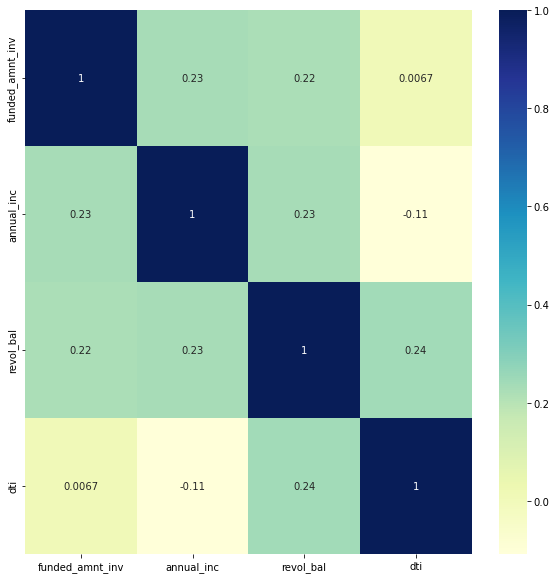

In [265]:
#determine the corelation
df_loans_fullypaid_wodc_corr_ds = df_loans_fullypaid_wodc[['funded_amnt_inv', 'annual_inc','revol_bal','dti']]
df_loans_fullypaid_wodc_corr = df_loans_fullypaid_wodc_corr_ds.corr()

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(df_loans_fullypaid_wodc_corr, ax = ax, cmap ="YlGnBu", annot=True) 
plt.show()


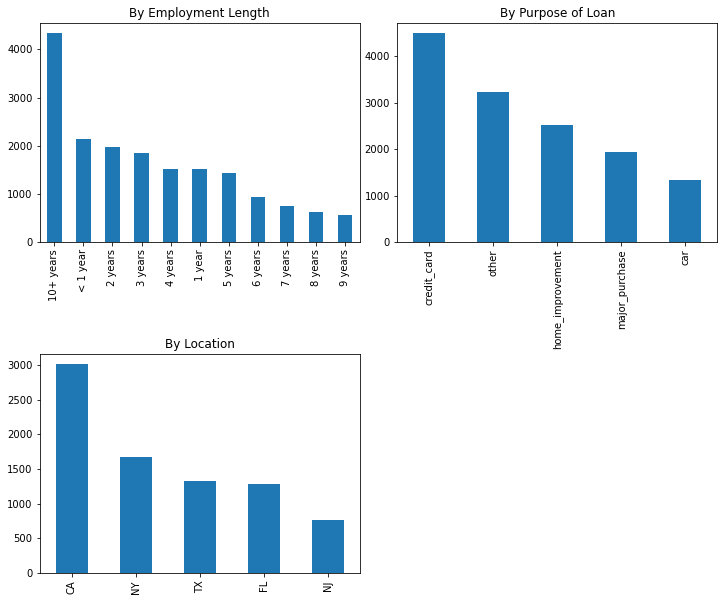

In [307]:
#Determine applicants based on experiance level
plt.subplot(221)
df_loans_fullypaid_wodc.emp_length.value_counts(normalize=False).plot(kind = 'bar', title = "By Employment Length",figsize=(10,8))
plt.tight_layout(pad=0.5)


#Determine applicants based on the top 5 purpose of the loan
plt.subplot(222)
df_loans_fullypaid_wodc.purpose.value_counts().sort_values(ascending=False)[:5].plot(kind='bar', title="By Purpose of Loan")

plt.tight_layout(pad=0.5)


#Determine top 5 applicants from the location
plt.subplot(223)
df_loans_fullypaid_wodc.addr_state.value_counts().sort_values(ascending=False)[:5].plot(kind='bar', title="By Location")

plt.show()

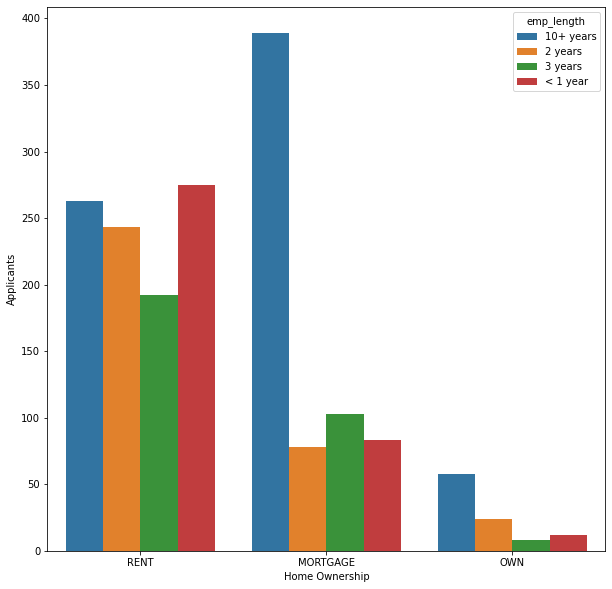

In [431]:
#take a look at the number of applicants per home ownership status
 

df_loans_fullypaid_wodc_CA = df_loans_fullypaid_wodc[(df_loans_fullypaid_wodc.addr_state=='CA') &
                                                     (df_loans_fullypaid_wodc.home_ownership!='OTHER') &
                                                    (df_loans_fullypaid_wodc.home_ownership!='NONE') &
                                                     ((df_loans_fullypaid_wodc.emp_length =='10+ years') |
                                                     (df_loans_fullypaid_wodc.emp_length =='< 1 year')|
                                                     (df_loans_fullypaid_wodc.emp_length == '2 years')|
                                                     (df_loans_fullypaid_wodc.emp_length == '3 years'))]
                                                    

plt.figure(figsize=(10,10))
sns.countplot(x='home_ownership', hue='emp_length', data=df_loans_fullypaid_wodc_CA)
plt.xlabel("Home Ownership")
plt.ylabel("Applicants")

plt.show()

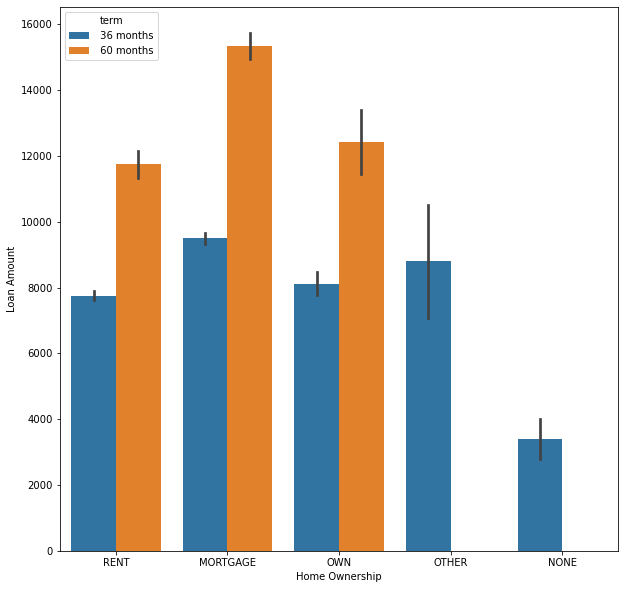

In [460]:
#take a look at the number of applicants per home ownership status

plt.figure(figsize=(10,10))
sns.barplot(x='home_ownership',y='loan_amnt', hue='term', data=df_loans_fullypaid_wodc)
plt.xlabel("Home Ownership")
plt.ylabel("Loan Amount")

plt.show()

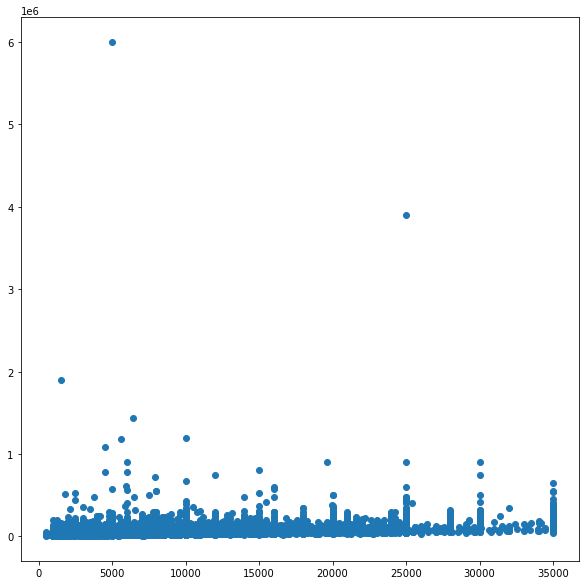

In [474]:
#take a look at the number of applicants per home ownership status
#df_loans_fullypaid_wodc['annual_inc'].plot(kind='kde', figsize=(10,6), title='Distribution of Reading Score')

plt.figure(figsize=(10,10))

plt.scatter(df_loans_fullypaid_wodc.loan_amnt, df_loans_fullypaid_wodc.annual_inc)
plt.show()

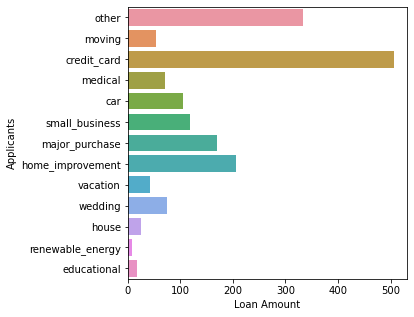

In [523]:
#take a look at the number of applicants per home ownership status
 

df_loans_fullypaid_wodc_CA = df_loans_fullypaid_wodc[(df_loans_fullypaid_wodc.addr_state=='CA') &
                                                     (df_loans_fullypaid_wodc.home_ownership!='OTHER') &
                                                    (df_loans_fullypaid_wodc.home_ownership!='NONE') &
                                                     ((df_loans_fullypaid_wodc.emp_length =='10+ years') |
                                                     (df_loans_fullypaid_wodc.emp_length =='< 1 year')|
                                                     (df_loans_fullypaid_wodc.emp_length == '2 years')|
                                                     (df_loans_fullypaid_wodc.emp_length == '3 years'))]
                                                    
percentage = lambda i: len(i) / 1

plt.figure(figsize=(5,5))
sns.barplot(x='loan_amnt',y='purpose', data=df_loans_fullypaid_wodc_CA, orient = 'h',estimator=percentage)
plt.xlabel("Loan Amount")
plt.ylabel("Applicants")

plt.show()

--------------------------------------------------------------------------------------------------

In [475]:
#filter data of  applicants

df_loans_current = df_loans[df_loans.loan_status == 'Current']
df_loans_current.shape

(1140, 54)

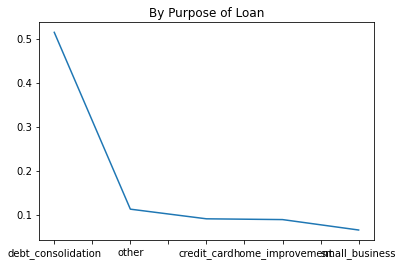

In [490]:
#Determine current accounts 
df_loans_current.purpose.value_counts(normalize=True).sort_values(ascending=False)[:5].plot(kind='line', title="By Purpose of Loan")
plt.show()

### 4.0 Recommendation

============
